In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the data from CSV files
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge the customers and transactions data on 'CustomerID'
customer_data = pd.merge(customers, transactions, on="CustomerID")

# Group the merged data by 'CustomerID' to calculate relevant features for clustering
customer_features = customer_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "TransactionID": "count",
    "Price": "mean"
}).rename(columns={"TotalValue": "TotalSpending", "TransactionID": "TransactionCount", "Price": "AvgPrice"})

In [19]:
# Standardize the features to make them comparable (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

In [20]:
# Initialize variables to track them
best_db_index = float("inf")
best_k = None
best_model = None

In [ ]:
# Try different values of k (number of clusters) from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    if db_index < best_db_index:
        best_db_index = db_index
        best_k = k
        best_model = kmeans

# Assign the final cluster labels to the customer data
final_labels = best_model.labels_
customer_features["Cluster"] = final_labels

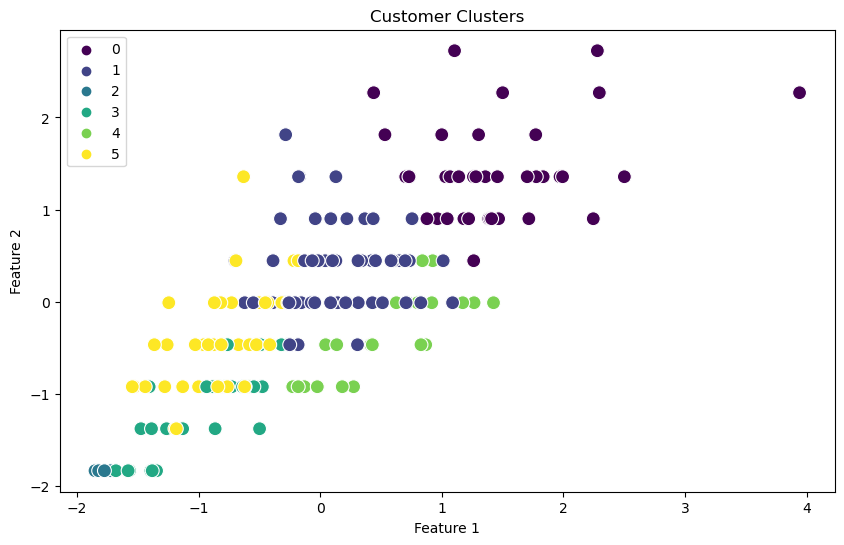

Number of clusters: 6
Davies-Bouldin Index: 0.8760


In [22]:
# Visualize the customer clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=final_labels, palette="viridis", s=100)
plt.title("Customer Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print the best number of clusters and Davies-Bouldin index
print(f'Number of clusters: {best_k}')
print(f'Davies-Bouldin Index: {best_db_index:.4f}')